
Solving the Teukolsky equation in Schwarzschild spacetime ($ a = 0$)

In [1]:
from hblteuk import *
import time

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [3]:
teuk = RadialTeukolsky(-2, 16, 0.5)
start = time.time()
teuk.solve(['Up','In'])
end = time.time()
print("Calculated in {} ms".format(1000*(end-start)))
print("RIn domain = [{}, {:.2f}]".format(teuk.domain['In'][0],teuk.domain['In'][1]))
print("RUp domain = [{}, {:.2f}]".format(teuk.domain['Up'][0],teuk.domain['Up'][1]))

Calculated in 27.70686149597168 ms
RIn domain = [2.0, 105.83]
RUp domain = [4.0, inf]


In [4]:
psi = HyperboloidalTeukolsky(-2, 16, 0.5)
start = time.time()
psi.solve(['Up','In'])
end = time.time()
print("Calculated in {} ms".format(1000*(end-start)))
print("PsiIn domain = [{}, {:.2f}]".format(psi.domain['In'][0],psi.domain['In'][1]))
print("PsiUp domain = [{}, {:.2f}]".format(psi.domain['Up'][0],psi.domain['Up'][1]))

Calculated in 34.21425819396973 ms
PsiIn domain = [0.018898815748423097, 1.00]
PsiUp domain = [0.0, 0.50]


In [8]:
psi('In')

In [4]:
comp_values = {"In":{0: (-2, 16, 0.5, 20.)}, "Up":{0: (-2, 16, 0.5, 20.)}}
comp_results = {"In":{0: -1.1163420951466392e24 - (1.0403492600214159e24)*1j}, "Up":{0: -170325.778562383167 - 302813.293563351102j}}
comp_results_deriv = {"In":{0: -7.799482595126929e23 - 8.777127845299971e23*1j}, "Up":{0: 72214.06348464891 + 189753.1635733067j}}

In [5]:
comp_results["In"][0]

(-1.1163420951466392e+24-1.0403492600214159e+24j)

In [6]:
print(np.abs(1-teuk('In')(comp_values["In"][0][3], deriv=0)/comp_results["In"][0]))
print(np.abs(1-teuk('Up')(comp_values["Up"][0][3], deriv=0)/comp_results["Up"][0]))
print(np.abs(1-teuk('In')(comp_values["In"][0][3], deriv=1)/comp_results_deriv["In"][0]))
print(np.abs(1-teuk('Up')(comp_values["Up"][0][3], deriv=1)/comp_results_deriv["Up"][0]))

3.315079001949699e-13
1.1931073194491025e-14
3.3348959891787065e-13
2.6790624965495123e-14


In [7]:
teuk()['Up'](20., deriv=1)

(72214.06348464615+189753.16357330198j)

In [8]:
1-teuk.get_hyperboloidal('Up')(0., deriv=1)/(a1sigma0(teuk.s, teuk.l*(teuk.l + 1) - teuk.s*(teuk.s + 1), teuk.frequency))

(3.552713678800501e-14-3.9638519863337627e-14j)

In [9]:
abs(2.*b1sigma1(teuk.s, teuk.l*(teuk.l + 1) - teuk.s*(teuk.s + 1), teuk.frequency)), abs(teuk.get_hyperboloidal('In')(1., deriv=1))

(144.7937525214081, 144.79375252140824)

In [10]:
teuk('Up')(comp_values["Up"][0][3], deriv=0)/(teuk.get_hyperboloidal('Up')(0., deriv=1)/a1sigma0(teuk.s, teuk.l*(teuk.l + 1) - teuk.s*(teuk.s + 1), teuk.frequency))

(-170325.77856240407-302813.2935633521j)

In [11]:
Rt = teuk()
rstart = 20
rend = rstart + 2*np.pi*5/Rt['In'].frequency
if rend > Rt['In'].domain[0]:
    rend = Rt['In'].domain[0]
rvals = np.linspace(rstart, rend, num=300)
Rtvals = Rt['In'](rvals)

In [12]:
Psi = teuk.get_hyperboloidal()
sigstart = Psi['In'].domain[0]
sigend = Psi['In'].domains[-1]
sigvals = np.linspace(sigstart, sigend, num=300)
psivals = Psi['In'](sigvals)

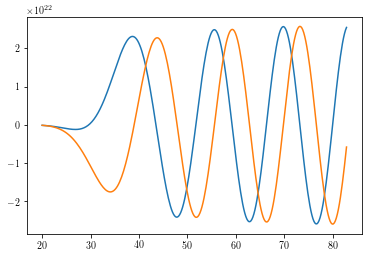

In [13]:
plt.plot(rvals, np.real(rvals**(1+2*teuk.s)*Rtvals))
plt.plot(rvals, np.imag(rvals**(1+2*teuk.s)*Rtvals))
#plt.plot(rvals, np.real(Rtvals))
#plt.plot(rvals, np.imag(Rtvals))
plt.show()

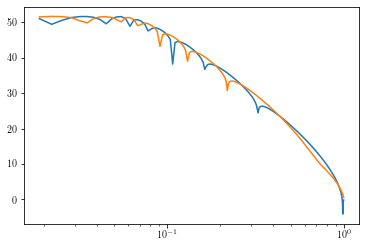

In [14]:
plt.xscale('log')
plt.plot(sigvals[:], np.log(np.abs(np.real(psivals[:]))))
plt.plot(sigvals[:], np.log(np.abs(np.imag(psivals[:]))))
plt.show()

In [13]:
import time
start = time.time()
s = 2
l = 60
omega = 0.03
cs, domain=multichebteuk(s, l, omega)
end = time.time()
print(end-start)

0.14741873741149902


In [259]:
n=cs.size - 1
ftest=ch.Chebyshev(cs[n], domain=[domain[n],domain[n+1]])
print([domain[n],domain[n+1]])
ftest(0.4999)

[0.4788618422717033, 0.5]


(-2.0601874931681734e+157-4.298198902127338e+156j)

In [260]:
n=0
ftest=ch.Chebyshev(cs[n], domain=[domain[n],domain[n+1]])
print([domain[n],domain[n+1]])
ftest(0.0001)

[0.0, 1.642042592356615e-05]


(-2.8058523160718785e+22+1.078241494529699e+23j)

In [261]:
n_cs = cs.size
flist = np.empty(n_cs, dtype=object)
for i in range(n_cs):
    flist[i] = ch.Chebyshev(cs[i], domain=[domain[i], domain[i+1]])

In [262]:
def multi_chebyshev(sigma, funcs, domains):
    for i in range(funcs.size):
        if sigma <= domain[i+1]:
            return funcs[i](sigma)
    return 0

multi_chebyshev_vec = np.vectorize(multi_chebyshev, excluded=[1, 2])

In [263]:
def multi_chebyshev_x(x, funcs, domains):
    return multi_chebyshev_vec(sigmaOfX(x, domains[0], domains[-1]), funcs, domains)
def log_multi_chebyshev(x, funcs, domains):
    return np.log(np.abs(multi_chebyshev_vec(sigmaOfX(x, domains[0], domains[-1]), funcs, domains)))

In [264]:
ctestCoeffs = ch.chebinterpolate(log_multi_chebyshev, 1000, args=(flist, domain))
ctest = ch.Chebyshev(ctestCoeffs, domain=[domain[0], domain[-1]])
#ctestCoeffs2 = ch.chebinterpolate(multi_chebyshev_x, 50, args=(flist, domain))
#ctest2 = ch.Chebyshev(ctestCoeffs2, domain=[domain[0], domain[-1]])

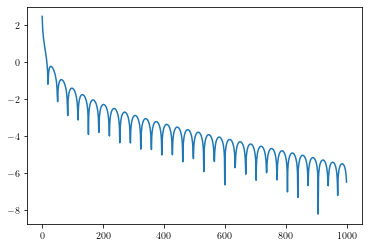

In [265]:
plt.plot(np.log10(np.abs(ctestCoeffs)))
#plt.plot(np.log10(np.abs(ctestCoeffs2)))
plt.show()

In [266]:
sigma = np.linspace(domain[0], domain[-1], num= 200)
psi = multi_chebyshev_vec(sigma, flist, domain)
psiComp = np.exp(ctest(sigma))
psiComp2 = ctest2(sigma)

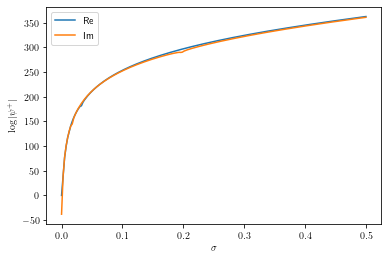

In [267]:
plt.plot(sigma, np.log(np.abs(np.real(psi))), label=r"Re")
plt.plot(sigma, np.log(np.abs(np.imag(psi))), label=r"Im")
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\log|\psi^+|$')
plt.legend()
plt.show()

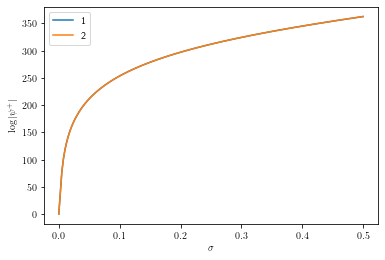

In [268]:
plt.plot(sigma, np.log(np.abs(psi)), label=r"1")
plt.plot(sigma, np.log(psiComp), label=r"2")
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\log|\psi^+|$')
plt.legend()
plt.show()

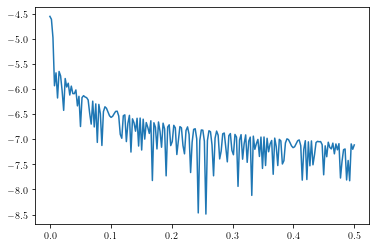

In [269]:
plt.plot(sigma, np.log10(np.abs(1-psiComp/np.abs(psi))))
#plt.plot(sigma, np.log10(np.abs(1-np.abs(psiComp2)/np.abs(psi))))
#plt.plot(sigma, np.log10(np.abs(1-psiComp2/psi)))
plt.show()

In [256]:
rtest=2.2/domain[1]
print(rtest)
print(rescaleteuk(2, omega, rtest)*f(2/rtest))
print(rescaleteuk(-2, omega, rtest)*fm2(2/rtest))

13392.722891122628
(-6.669782228559607e-22+2.2229926217741414e-21j)
(-690419356873.9948+2300830079531.1724j)


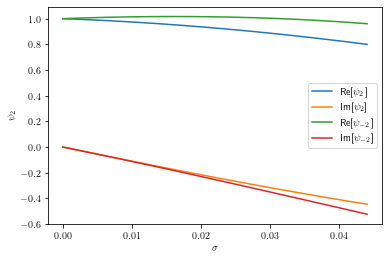

In [257]:
plotdata = f.linspace()
plotdata2 = fm2.linspace()
plt.plot(plotdata[0], np.real(plotdata[1]), label=r"Re[$\psi_2$]")
plt.plot(plotdata[0], np.imag(plotdata[1]), label=r"Im[$\psi_2$]")
#plt.plot(plotdata[0], np.abs(plotdata[1]), label=r"Abs[$\psi_2$]")
plt.plot(plotdata2[0], np.real(plotdata2[1]), label=r"Re[$\psi_{-2}$]")
plt.plot(plotdata2[0], np.imag(plotdata2[1]), label=r"Im[$\psi_{-2}$]")
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\psi_2$')
plt.legend()
plt.show()

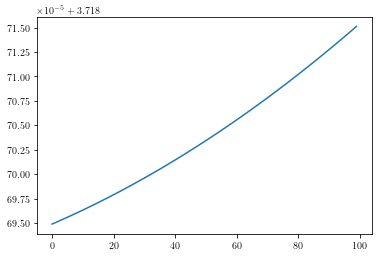

In [14]:
plt.plot(np.log10(np.abs(checkteuk(2, l, omega, f))))
plt.show()

In [46]:
boundaryListNB = np.zeros(11)
boundaryListNB[1:] = 0.1*(0.8/0.1)**np.linspace(0, 1, num=10)

In [47]:
boundaryListNB = 1-boundaryListNB

In [48]:
boundaryListNB

array([1.        , 0.9       , 0.8740079 , 0.84125989, 0.8       ,
       0.74801579, 0.68251979, 0.6       , 0.49603158, 0.36503958,
       0.2       ])